# Introduction to Deep Learning

## Objectives
In this lab, you will embark on the journey of creating a ANN, DNN model tailored for predicting the total expenditure of potential consumers based on various characteristics. As a vehicle salesperson, your goal is to develop a model that can effectively estimate the overall spending potential.

Your task is to build and train an ANN/DNN model using tensorflow in a Jupyter notebook.

Feel Free to Explore the dataset, analyze its contents, and derive meaningful insights. Additionally, feel empowered to create insightful visualizations that enhance the understanding of the data. 

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Step 2: Load and Explore the Data

In [2]:
df = pd.read_csv("./car_purchasing.csv", encoding="latin-1")
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB
None


In [4]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


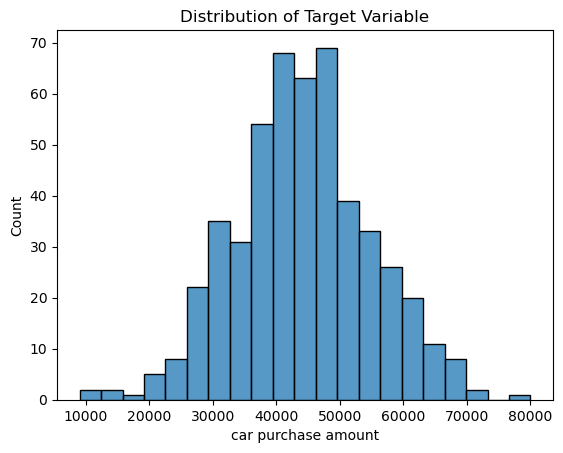

In [6]:
sns.histplot(x='car purchase amount', data=df)
plt.title('Distribution of Target Variable')
plt.show()

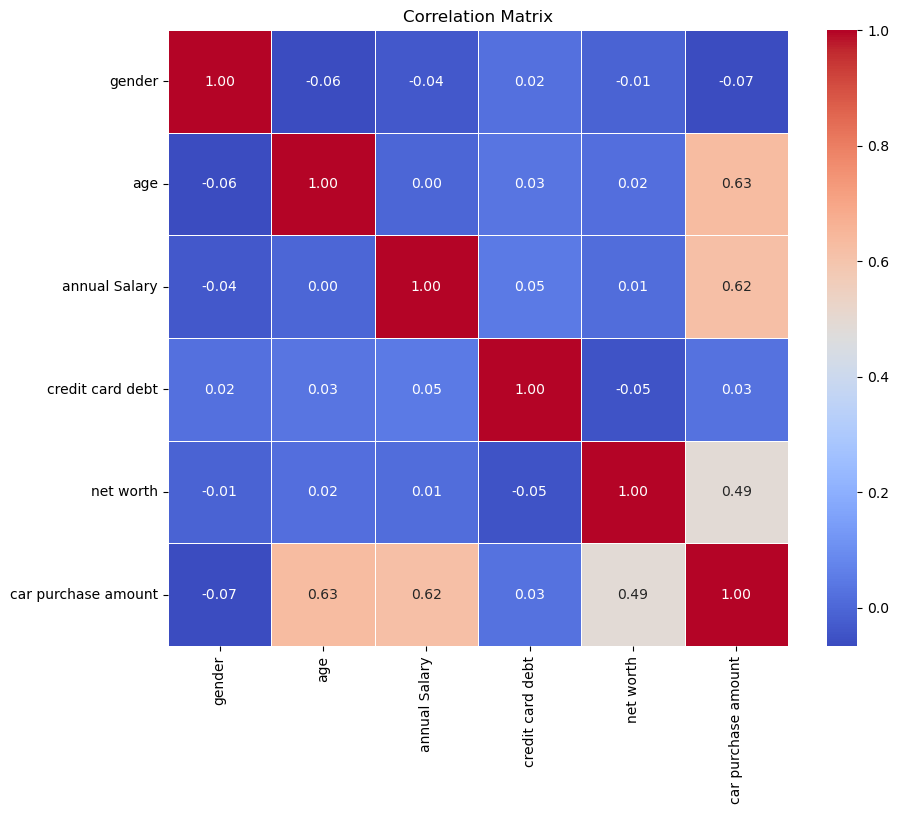

In [7]:
corr_matrix = df.drop(["customer name", "customer e-mail", "country"], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Step 3: Data Cleaning and Preprocessing


**Hint: You could use a `StandardScaler()` or `MinMaxScaler()`**

In [8]:
country_encoder = LabelEncoder() # Encode Object/str feature
df["country"] = country_encoder.fit_transform(df["country"])
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,27,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,17,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,1,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,41,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,26,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


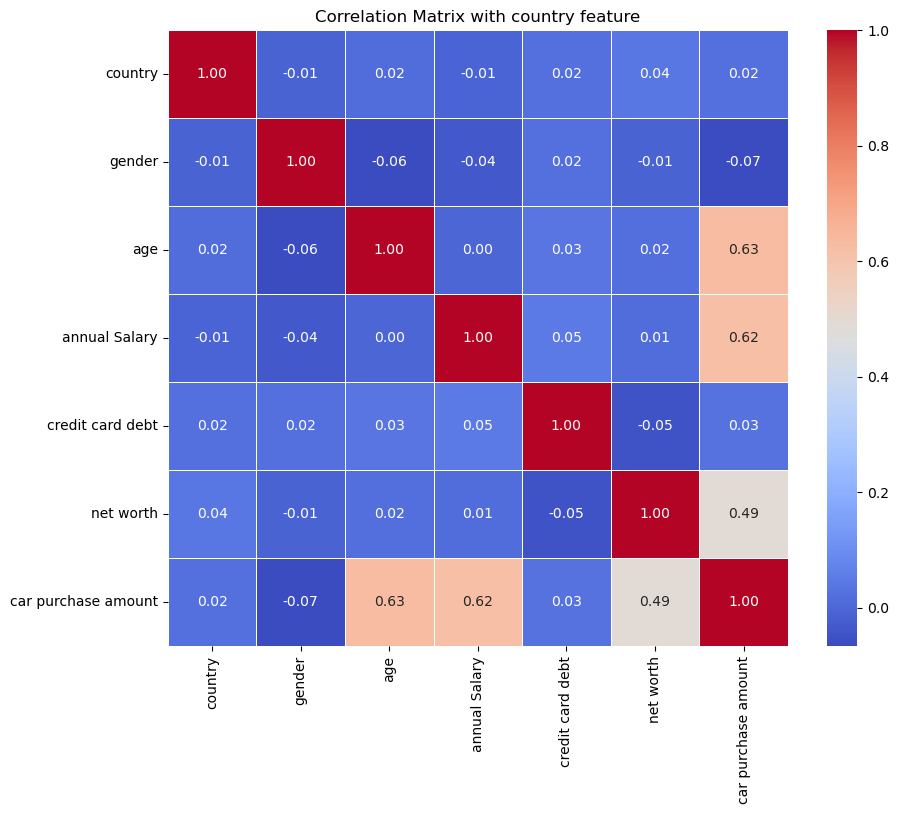

In [9]:
# Revisualize heatmap with country feature
corr_matrix = df.drop(["customer name", "customer e-mail"], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with country feature')
plt.show()

In [10]:
X = df.drop(["customer name", "customer e-mail", "car purchase amount"], axis=1)
y = df["car purchase amount"]

In [11]:
scaler = StandardScaler() # Scaling a X (input feature)
X = scaler.fit_transform(X)

# Step 4: Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 5: Build the Artifical Neural Network Model

In [13]:
model = Sequential() # Define Sequential Model

# Define Input, Hidden layer
model.add(Dense(units= 1024, input_dim=X_train.shape[1], activation='linear'))

# Define Output layer
model.add(Dense(units= 1, activation='linear'))  # Use linear activation for regression

# Choosing Optimizer and loss function
model.compile(optimizer='adam', loss='MSE')

### Clarify Your Artificial Neural Network (ANN) Model, Optimization, and Loss Function Choices and justify

Input Layer: Appropriate, with units equal to the number of features.

Hidden Layer: Linear activation is suitable for regression.

Output Layer: with one unit and a linear activation for regression.

Optimizer: Adam is a widely used and effective choice and fast.

Loss Function: MSE is appropriate for regression tasks.

Justification: Regression is suitable for predicting car purchase amounts with continuous features.

# Step 6: Train the Model


In [14]:
# Train the model
h = model.fit(X_train, y_train, epochs=3500, batch_size=128, validation_split=0.2)

Epoch 1/3500
3/3 [==============================] - 0s 22ms/step - loss: 2051572480.0000 - val_loss: 2131903104.0000
Epoch 2/3500
3/3 [==============================] - 0s 4ms/step - loss: 2051555072.0000 - val_loss: 2131884032.0000
Epoch 3/3500
3/3 [==============================] - 0s 4ms/step - loss: 2051538944.0000 - val_loss: 2131864192.0000
Epoch 4/3500
3/3 [==============================] - 0s 5ms/step - loss: 2051520128.0000 - val_loss: 2131843072.0000
Epoch 5/3500
3/3 [==============================] - 0s 4ms/step - loss: 2051500672.0000 - val_loss: 2131819904.0000
Epoch 6/3500
3/3 [==============================] - 0s 5ms/step - loss: 2051479552.0000 - val_loss: 2131794688.0000
Epoch 7/3500
3/3 [==============================] - 0s 5ms/step - loss: 2051456000.0000 - val_loss: 2131766912.0000
Epoch 8/3500
3/3 [==============================] - 0s 4ms/step - loss: 2051430400.0000 - val_loss: 2131735808.0000
Epoch 9/3500
3/3 [==============================] - 0s 5ms/step - loss:

3/3 [==============================] - 0s 4ms/step - loss: 2039265920.0000 - val_loss: 2118044032.0000
Epoch 72/3500
3/3 [==============================] - 0s 4ms/step - loss: 2038875776.0000 - val_loss: 2117616896.0000
Epoch 73/3500
3/3 [==============================] - 0s 4ms/step - loss: 2038490496.0000 - val_loss: 2117184128.0000
Epoch 74/3500
3/3 [==============================] - 0s 4ms/step - loss: 2038103296.0000 - val_loss: 2116740352.0000
Epoch 75/3500
3/3 [==============================] - 0s 4ms/step - loss: 2037702016.0000 - val_loss: 2116294912.0000
Epoch 76/3500
3/3 [==============================] - 0s 4ms/step - loss: 2037286912.0000 - val_loss: 2115847936.0000
Epoch 77/3500
3/3 [==============================] - 0s 4ms/step - loss: 2036888320.0000 - val_loss: 2115386752.0000
Epoch 78/3500
3/3 [==============================] - 0s 4ms/step - loss: 2036463872.0000 - val_loss: 2114922112.0000
Epoch 79/3500
3/3 [==============================] - 0s 4ms/step - loss: 20360

Epoch 141/3500
3/3 [==============================] - 0s 4ms/step - loss: 1999310080.0000 - val_loss: 2073633408.0000
Epoch 142/3500
3/3 [==============================] - 0s 4ms/step - loss: 1998511872.0000 - val_loss: 2072796416.0000
Epoch 143/3500
3/3 [==============================] - 0s 4ms/step - loss: 1997772544.0000 - val_loss: 2071952128.0000
Epoch 144/3500
3/3 [==============================] - 0s 4ms/step - loss: 1997008256.0000 - val_loss: 2071108224.0000
Epoch 145/3500
3/3 [==============================] - 0s 4ms/step - loss: 1996244608.0000 - val_loss: 2070255616.0000
Epoch 146/3500
3/3 [==============================] - 0s 4ms/step - loss: 1995455104.0000 - val_loss: 2069402624.0000
Epoch 147/3500
3/3 [==============================] - 0s 4ms/step - loss: 1994677888.0000 - val_loss: 2068535296.0000
Epoch 148/3500
3/3 [==============================] - 0s 4ms/step - loss: 1993911552.0000 - val_loss: 2067657472.0000
Epoch 149/3500
3/3 [==============================] - 0s

3/3 [==============================] - 0s 8ms/step - loss: 1936456064.0000 - val_loss: 2003841408.0000
Epoch 211/3500
3/3 [==============================] - 0s 5ms/step - loss: 1935393536.0000 - val_loss: 2002663680.0000
Epoch 212/3500
3/3 [==============================] - 0s 5ms/step - loss: 1934281344.0000 - val_loss: 2001493248.0000
Epoch 213/3500
3/3 [==============================] - 0s 4ms/step - loss: 1933231104.0000 - val_loss: 2000294272.0000
Epoch 214/3500
3/3 [==============================] - 0s 4ms/step - loss: 1932193536.0000 - val_loss: 1999080448.0000
Epoch 215/3500
3/3 [==============================] - 0s 5ms/step - loss: 1931080448.0000 - val_loss: 1997880704.0000
Epoch 216/3500
3/3 [==============================] - 0s 4ms/step - loss: 1930017408.0000 - val_loss: 1996678912.0000
Epoch 217/3500
3/3 [==============================] - 0s 5ms/step - loss: 1928912128.0000 - val_loss: 1995483136.0000
Epoch 218/3500
3/3 [==============================] - 0s 5ms/step - los

3/3 [==============================] - 0s 4ms/step - loss: 1855590784.0000 - val_loss: 1914359168.0000
Epoch 280/3500
3/3 [==============================] - 0s 5ms/step - loss: 1854325376.0000 - val_loss: 1912946304.0000
Epoch 281/3500
3/3 [==============================] - 0s 4ms/step - loss: 1853070336.0000 - val_loss: 1911524096.0000
Epoch 282/3500
3/3 [==============================] - 0s 4ms/step - loss: 1851742208.0000 - val_loss: 1910118656.0000
Epoch 283/3500
3/3 [==============================] - 0s 4ms/step - loss: 1850449920.0000 - val_loss: 1908691328.0000
Epoch 284/3500
3/3 [==============================] - 0s 4ms/step - loss: 1849193728.0000 - val_loss: 1907247488.0000
Epoch 285/3500
3/3 [==============================] - 0s 4ms/step - loss: 1847862912.0000 - val_loss: 1905815168.0000
Epoch 286/3500
3/3 [==============================] - 0s 4ms/step - loss: 1846597888.0000 - val_loss: 1904356992.0000
Epoch 287/3500
3/3 [==============================] - 0s 4ms/step - los

3/3 [==============================] - 0s 4ms/step - loss: 1762181120.0000 - val_loss: 1811362048.0000
Epoch 349/3500
3/3 [==============================] - 0s 4ms/step - loss: 1760736640.0000 - val_loss: 1809800448.0000
Epoch 350/3500
3/3 [==============================] - 0s 4ms/step - loss: 1759306752.0000 - val_loss: 1808246144.0000
Epoch 351/3500
3/3 [==============================] - 0s 4ms/step - loss: 1757897728.0000 - val_loss: 1806701824.0000
Epoch 352/3500
3/3 [==============================] - 0s 4ms/step - loss: 1756457344.0000 - val_loss: 1805166336.0000
Epoch 353/3500
3/3 [==============================] - 0s 4ms/step - loss: 1755054080.0000 - val_loss: 1803608064.0000
Epoch 354/3500
3/3 [==============================] - 0s 4ms/step - loss: 1753614080.0000 - val_loss: 1802036864.0000
Epoch 355/3500
3/3 [==============================] - 0s 4ms/step - loss: 1752185600.0000 - val_loss: 1800451840.0000
Epoch 356/3500
3/3 [==============================] - 0s 4ms/step - los

3/3 [==============================] - 0s 4ms/step - loss: 1659947776.0000 - val_loss: 1699002368.0000
Epoch 418/3500
3/3 [==============================] - 0s 4ms/step - loss: 1658456192.0000 - val_loss: 1697335936.0000
Epoch 419/3500
3/3 [==============================] - 0s 4ms/step - loss: 1656918016.0000 - val_loss: 1695671552.0000
Epoch 420/3500
3/3 [==============================] - 0s 4ms/step - loss: 1655407872.0000 - val_loss: 1693999872.0000
Epoch 421/3500
3/3 [==============================] - 0s 4ms/step - loss: 1653890816.0000 - val_loss: 1692321024.0000
Epoch 422/3500
3/3 [==============================] - 0s 4ms/step - loss: 1652356352.0000 - val_loss: 1690643200.0000
Epoch 423/3500
3/3 [==============================] - 0s 4ms/step - loss: 1650811648.0000 - val_loss: 1688982016.0000
Epoch 424/3500
3/3 [==============================] - 0s 4ms/step - loss: 1649331456.0000 - val_loss: 1687289472.0000
Epoch 425/3500
3/3 [==============================] - 0s 4ms/step - los

3/3 [==============================] - 0s 4ms/step - loss: 1553064832.0000 - val_loss: 1582089984.0000
Epoch 487/3500
3/3 [==============================] - 0s 4ms/step - loss: 1551487744.0000 - val_loss: 1580329216.0000
Epoch 488/3500
3/3 [==============================] - 0s 4ms/step - loss: 1549852544.0000 - val_loss: 1578593536.0000
Epoch 489/3500
3/3 [==============================] - 0s 4ms/step - loss: 1548263040.0000 - val_loss: 1576850048.0000
Epoch 490/3500
3/3 [==============================] - 0s 4ms/step - loss: 1546736896.0000 - val_loss: 1575086336.0000
Epoch 491/3500
3/3 [==============================] - 0s 4ms/step - loss: 1545095424.0000 - val_loss: 1573355776.0000
Epoch 492/3500
3/3 [==============================] - 0s 4ms/step - loss: 1543534848.0000 - val_loss: 1571617152.0000
Epoch 493/3500
3/3 [==============================] - 0s 4ms/step - loss: 1541927552.0000 - val_loss: 1569892352.0000
Epoch 494/3500
3/3 [==============================] - 0s 4ms/step - los

3/3 [==============================] - 0s 4ms/step - loss: 1444510720.0000 - val_loss: 1464553728.0000
Epoch 556/3500
3/3 [==============================] - 0s 4ms/step - loss: 1442914688.0000 - val_loss: 1462881280.0000
Epoch 557/3500
3/3 [==============================] - 0s 4ms/step - loss: 1441276672.0000 - val_loss: 1461237120.0000
Epoch 558/3500
3/3 [==============================] - 0s 5ms/step - loss: 1439766144.0000 - val_loss: 1459550848.0000
Epoch 559/3500
3/3 [==============================] - 0s 4ms/step - loss: 1438167296.0000 - val_loss: 1457870848.0000
Epoch 560/3500
3/3 [==============================] - 0s 4ms/step - loss: 1436604416.0000 - val_loss: 1456182656.0000
Epoch 561/3500
3/3 [==============================] - 0s 5ms/step - loss: 1435053696.0000 - val_loss: 1454482688.0000
Epoch 562/3500
3/3 [==============================] - 0s 4ms/step - loss: 1433480320.0000 - val_loss: 1452785408.0000
Epoch 563/3500
3/3 [==============================] - 0s 4ms/step - los

3/3 [==============================] - 0s 4ms/step - loss: 1335336192.0000 - val_loss: 1347187840.0000
Epoch 625/3500
3/3 [==============================] - 0s 4ms/step - loss: 1333733760.0000 - val_loss: 1345476224.0000
Epoch 626/3500
3/3 [==============================] - 0s 4ms/step - loss: 1332178688.0000 - val_loss: 1343744640.0000
Epoch 627/3500
3/3 [==============================] - 0s 4ms/step - loss: 1330584832.0000 - val_loss: 1342027392.0000
Epoch 628/3500
3/3 [==============================] - 0s 5ms/step - loss: 1328952960.0000 - val_loss: 1340344192.0000
Epoch 629/3500
3/3 [==============================] - 0s 5ms/step - loss: 1327405440.0000 - val_loss: 1338652416.0000
Epoch 630/3500
3/3 [==============================] - 0s 4ms/step - loss: 1325769088.0000 - val_loss: 1336977792.0000
Epoch 631/3500
3/3 [==============================] - 0s 5ms/step - loss: 1324233344.0000 - val_loss: 1335261440.0000
Epoch 632/3500
3/3 [==============================] - 0s 4ms/step - los

3/3 [==============================] - 0s 4ms/step - loss: 1226074752.0000 - val_loss: 1231048704.0000
Epoch 694/3500
3/3 [==============================] - 0s 4ms/step - loss: 1224526336.0000 - val_loss: 1229401856.0000
Epoch 695/3500
3/3 [==============================] - 0s 4ms/step - loss: 1222953344.0000 - val_loss: 1227763456.0000
Epoch 696/3500
3/3 [==============================] - 0s 4ms/step - loss: 1221366144.0000 - val_loss: 1226127616.0000
Epoch 697/3500
3/3 [==============================] - 0s 4ms/step - loss: 1219808000.0000 - val_loss: 1224479232.0000
Epoch 698/3500
3/3 [==============================] - 0s 4ms/step - loss: 1218235136.0000 - val_loss: 1222846464.0000
Epoch 699/3500
3/3 [==============================] - 0s 4ms/step - loss: 1216663808.0000 - val_loss: 1221206656.0000
Epoch 700/3500
3/3 [==============================] - 0s 4ms/step - loss: 1215127296.0000 - val_loss: 1219550848.0000
Epoch 701/3500
3/3 [==============================] - 0s 4ms/step - los

3/3 [==============================] - 0s 4ms/step - loss: 1117601792.0000 - val_loss: 1117575808.0000
Epoch 763/3500
3/3 [==============================] - 0s 4ms/step - loss: 1116010880.0000 - val_loss: 1115937536.0000
Epoch 764/3500
3/3 [==============================] - 0s 4ms/step - loss: 1114467712.0000 - val_loss: 1114288512.0000
Epoch 765/3500
3/3 [==============================] - 0s 4ms/step - loss: 1112883456.0000 - val_loss: 1112679040.0000
Epoch 766/3500
3/3 [==============================] - 0s 4ms/step - loss: 1111321216.0000 - val_loss: 1111055104.0000
Epoch 767/3500
3/3 [==============================] - 0s 4ms/step - loss: 1109756288.0000 - val_loss: 1109433088.0000
Epoch 768/3500
3/3 [==============================] - 0s 4ms/step - loss: 1108194560.0000 - val_loss: 1107822976.0000
Epoch 769/3500
3/3 [==============================] - 0s 4ms/step - loss: 1106638208.0000 - val_loss: 1106215168.0000
Epoch 770/3500
3/3 [==============================] - 0s 4ms/step - los

3/3 [==============================] - 0s 4ms/step - loss: 1010127168.0000 - val_loss: 1006769792.0000
Epoch 832/3500
3/3 [==============================] - 0s 4ms/step - loss: 1008570880.0000 - val_loss: 1005171904.0000
Epoch 833/3500
3/3 [==============================] - 0s 4ms/step - loss: 1007024768.0000 - val_loss: 1003565696.0000
Epoch 834/3500
3/3 [==============================] - 0s 4ms/step - loss: 1005481088.0000 - val_loss: 1001946752.0000
Epoch 835/3500
3/3 [==============================] - 0s 4ms/step - loss: 1003918976.0000 - val_loss: 1000320000.0000
Epoch 836/3500
3/3 [==============================] - 0s 4ms/step - loss: 1002358144.0000 - val_loss: 998707904.0000
Epoch 837/3500
3/3 [==============================] - 0s 4ms/step - loss: 1000817472.0000 - val_loss: 997076992.0000
Epoch 838/3500
3/3 [==============================] - 0s 4ms/step - loss: 999269568.0000 - val_loss: 995452096.0000
Epoch 839/3500
3/3 [==============================] - 0s 4ms/step - loss: 9

3/3 [==============================] - 0s 4ms/step - loss: 902563968.0000 - val_loss: 896967296.0000
Epoch 902/3500
3/3 [==============================] - 0s 4ms/step - loss: 901054592.0000 - val_loss: 895411328.0000
Epoch 903/3500
3/3 [==============================] - 0s 4ms/step - loss: 899519104.0000 - val_loss: 893858624.0000
Epoch 904/3500
3/3 [==============================] - 0s 4ms/step - loss: 897996416.0000 - val_loss: 892296320.0000
Epoch 905/3500
3/3 [==============================] - 0s 4ms/step - loss: 896474112.0000 - val_loss: 890730368.0000
Epoch 906/3500
3/3 [==============================] - 0s 4ms/step - loss: 894948480.0000 - val_loss: 889174400.0000
Epoch 907/3500
3/3 [==============================] - 0s 4ms/step - loss: 893432128.0000 - val_loss: 887598208.0000
Epoch 908/3500
3/3 [==============================] - 0s 4ms/step - loss: 891915968.0000 - val_loss: 886027456.0000
Epoch 909/3500
3/3 [==============================] - 0s 4ms/step - loss: 890398336.000

Epoch 972/3500
3/3 [==============================] - 0s 4ms/step - loss: 795779840.0000 - val_loss: 788977152.0000
Epoch 973/3500
3/3 [==============================] - 0s 4ms/step - loss: 794295360.0000 - val_loss: 787489024.0000
Epoch 974/3500
3/3 [==============================] - 0s 4ms/step - loss: 792815488.0000 - val_loss: 786008384.0000
Epoch 975/3500
3/3 [==============================] - 0s 4ms/step - loss: 791336640.0000 - val_loss: 784518848.0000
Epoch 976/3500
3/3 [==============================] - 0s 4ms/step - loss: 789862272.0000 - val_loss: 783010240.0000
Epoch 977/3500
3/3 [==============================] - 0s 4ms/step - loss: 788391104.0000 - val_loss: 781510656.0000
Epoch 978/3500
3/3 [==============================] - 0s 4ms/step - loss: 786908288.0000 - val_loss: 780021696.0000
Epoch 979/3500
3/3 [==============================] - 0s 5ms/step - loss: 785423936.0000 - val_loss: 778534208.0000
Epoch 980/3500
3/3 [==============================] - 0s 4ms/step - loss

3/3 [==============================] - 0s 4ms/step - loss: 693899072.0000 - val_loss: 687225472.0000
Epoch 1043/3500
3/3 [==============================] - 0s 4ms/step - loss: 692473024.0000 - val_loss: 685794368.0000
Epoch 1044/3500
3/3 [==============================] - 0s 5ms/step - loss: 691049600.0000 - val_loss: 684364160.0000
Epoch 1045/3500
3/3 [==============================] - 0s 4ms/step - loss: 689632128.0000 - val_loss: 682937984.0000
Epoch 1046/3500
3/3 [==============================] - 0s 5ms/step - loss: 688207872.0000 - val_loss: 681528896.0000
Epoch 1047/3500
3/3 [==============================] - 0s 5ms/step - loss: 686786816.0000 - val_loss: 680108608.0000
Epoch 1048/3500
3/3 [==============================] - 0s 4ms/step - loss: 685365376.0000 - val_loss: 678695808.0000
Epoch 1049/3500
3/3 [==============================] - 0s 5ms/step - loss: 683957120.0000 - val_loss: 677277632.0000
Epoch 1050/3500
3/3 [==============================] - 0s 5ms/step - loss: 68252

3/3 [==============================] - 0s 5ms/step - loss: 596652224.0000 - val_loss: 590550720.0000
Epoch 1113/3500
3/3 [==============================] - 0s 5ms/step - loss: 595297152.0000 - val_loss: 589206272.0000
Epoch 1114/3500
3/3 [==============================] - 0s 5ms/step - loss: 593949504.0000 - val_loss: 587864384.0000
Epoch 1115/3500
3/3 [==============================] - 0s 4ms/step - loss: 592602752.0000 - val_loss: 586520064.0000
Epoch 1116/3500
3/3 [==============================] - 0s 5ms/step - loss: 591258112.0000 - val_loss: 585185024.0000
Epoch 1117/3500
3/3 [==============================] - 0s 4ms/step - loss: 589914752.0000 - val_loss: 583854720.0000
Epoch 1118/3500
3/3 [==============================] - 0s 4ms/step - loss: 588570624.0000 - val_loss: 582510976.0000
Epoch 1119/3500
3/3 [==============================] - 0s 5ms/step - loss: 587229824.0000 - val_loss: 581163136.0000
Epoch 1120/3500
3/3 [==============================] - 0s 4ms/step - loss: 58589

3/3 [==============================] - 0s 4ms/step - loss: 505236032.0000 - val_loss: 499804160.0000
Epoch 1183/3500
3/3 [==============================] - 0s 4ms/step - loss: 503978944.0000 - val_loss: 498541376.0000
Epoch 1184/3500
3/3 [==============================] - 0s 4ms/step - loss: 502725184.0000 - val_loss: 497276992.0000
Epoch 1185/3500
3/3 [==============================] - 0s 4ms/step - loss: 501474400.0000 - val_loss: 496009632.0000
Epoch 1186/3500
3/3 [==============================] - 0s 5ms/step - loss: 500222880.0000 - val_loss: 494762496.0000
Epoch 1187/3500
3/3 [==============================] - 0s 5ms/step - loss: 498964928.0000 - val_loss: 493508416.0000
Epoch 1188/3500
3/3 [==============================] - 0s 4ms/step - loss: 497720480.0000 - val_loss: 492259424.0000
Epoch 1189/3500
3/3 [==============================] - 0s 5ms/step - loss: 496471648.0000 - val_loss: 491015872.0000
Epoch 1190/3500
3/3 [==============================] - 0s 4ms/step - loss: 49523

3/3 [==============================] - 0s 4ms/step - loss: 420697792.0000 - val_loss: 415838656.0000
Epoch 1253/3500
3/3 [==============================] - 0s 4ms/step - loss: 419550112.0000 - val_loss: 414682880.0000
Epoch 1254/3500
3/3 [==============================] - 0s 4ms/step - loss: 418398112.0000 - val_loss: 413521792.0000
Epoch 1255/3500
3/3 [==============================] - 0s 5ms/step - loss: 417250336.0000 - val_loss: 412378176.0000
Epoch 1256/3500
3/3 [==============================] - 0s 4ms/step - loss: 416106048.0000 - val_loss: 411238592.0000
Epoch 1257/3500
3/3 [==============================] - 0s 4ms/step - loss: 414959936.0000 - val_loss: 410088064.0000
Epoch 1258/3500
3/3 [==============================] - 0s 4ms/step - loss: 413814944.0000 - val_loss: 408948640.0000
Epoch 1259/3500
3/3 [==============================] - 0s 4ms/step - loss: 412671872.0000 - val_loss: 407810432.0000
Epoch 1260/3500
3/3 [==============================] - 0s 4ms/step - loss: 41153

3/3 [==============================] - 0s 4ms/step - loss: 343851840.0000 - val_loss: 340218432.0000
Epoch 1323/3500
3/3 [==============================] - 0s 4ms/step - loss: 342810656.0000 - val_loss: 339193056.0000
Epoch 1324/3500
3/3 [==============================] - 0s 4ms/step - loss: 341776992.0000 - val_loss: 338164736.0000
Epoch 1325/3500
3/3 [==============================] - 0s 5ms/step - loss: 340738560.0000 - val_loss: 337143008.0000
Epoch 1326/3500
3/3 [==============================] - 0s 4ms/step - loss: 339697664.0000 - val_loss: 336127648.0000
Epoch 1327/3500
3/3 [==============================] - 0s 4ms/step - loss: 338669216.0000 - val_loss: 335108192.0000
Epoch 1328/3500
3/3 [==============================] - 0s 4ms/step - loss: 337633216.0000 - val_loss: 334096864.0000
Epoch 1329/3500
3/3 [==============================] - 0s 4ms/step - loss: 336606464.0000 - val_loss: 333082624.0000
Epoch 1330/3500
3/3 [==============================] - 0s 4ms/step - loss: 33557

3/3 [==============================] - 0s 5ms/step - loss: 275246176.0000 - val_loss: 272514496.0000
Epoch 1393/3500
3/3 [==============================] - 0s 4ms/step - loss: 274327456.0000 - val_loss: 271610208.0000
Epoch 1394/3500
3/3 [==============================] - 0s 4ms/step - loss: 273409632.0000 - val_loss: 270707360.0000
Epoch 1395/3500
3/3 [==============================] - 0s 4ms/step - loss: 272498272.0000 - val_loss: 269817152.0000
Epoch 1396/3500
3/3 [==============================] - 0s 4ms/step - loss: 271582272.0000 - val_loss: 268922592.0000
Epoch 1397/3500
3/3 [==============================] - 0s 4ms/step - loss: 270675232.0000 - val_loss: 268032464.0000
Epoch 1398/3500
3/3 [==============================] - 0s 4ms/step - loss: 269766208.0000 - val_loss: 267135696.0000
Epoch 1399/3500
3/3 [==============================] - 0s 4ms/step - loss: 268854624.0000 - val_loss: 266243584.0000
Epoch 1400/3500
3/3 [==============================] - 0s 4ms/step - loss: 26795

3/3 [==============================] - 0s 4ms/step - loss: 215262848.0000 - val_loss: 213374688.0000
Epoch 1463/3500
3/3 [==============================] - 0s 4ms/step - loss: 214473216.0000 - val_loss: 212585424.0000
Epoch 1464/3500
3/3 [==============================] - 0s 4ms/step - loss: 213676736.0000 - val_loss: 211805184.0000
Epoch 1465/3500
3/3 [==============================] - 0s 4ms/step - loss: 212887152.0000 - val_loss: 211015264.0000
Epoch 1466/3500
3/3 [==============================] - 0s 4ms/step - loss: 212105568.0000 - val_loss: 210221568.0000
Epoch 1467/3500
3/3 [==============================] - 0s 4ms/step - loss: 211312032.0000 - val_loss: 209437232.0000
Epoch 1468/3500
3/3 [==============================] - 0s 4ms/step - loss: 210524496.0000 - val_loss: 208658944.0000
Epoch 1469/3500
3/3 [==============================] - 0s 4ms/step - loss: 209746272.0000 - val_loss: 207886176.0000
Epoch 1470/3500
3/3 [==============================] - 0s 4ms/step - loss: 20896

3/3 [==============================] - 0s 4ms/step - loss: 163993472.0000 - val_loss: 162543360.0000
Epoch 1533/3500
3/3 [==============================] - 0s 4ms/step - loss: 163323744.0000 - val_loss: 161878368.0000
Epoch 1534/3500
3/3 [==============================] - 0s 4ms/step - loss: 162652352.0000 - val_loss: 161218864.0000
Epoch 1535/3500
3/3 [==============================] - 0s 4ms/step - loss: 161991392.0000 - val_loss: 160563392.0000
Epoch 1536/3500
3/3 [==============================] - 0s 4ms/step - loss: 161322832.0000 - val_loss: 159903440.0000
Epoch 1537/3500
3/3 [==============================] - 0s 4ms/step - loss: 160659264.0000 - val_loss: 159238192.0000
Epoch 1538/3500
3/3 [==============================] - 0s 4ms/step - loss: 159998864.0000 - val_loss: 158578992.0000
Epoch 1539/3500
3/3 [==============================] - 0s 4ms/step - loss: 159341216.0000 - val_loss: 157914288.0000
Epoch 1540/3500
3/3 [==============================] - 0s 4ms/step - loss: 15868

3/3 [==============================] - 0s 4ms/step - loss: 121282152.0000 - val_loss: 120164560.0000
Epoch 1603/3500
3/3 [==============================] - 0s 4ms/step - loss: 120735424.0000 - val_loss: 119617616.0000
Epoch 1604/3500
3/3 [==============================] - 0s 4ms/step - loss: 120186288.0000 - val_loss: 119076608.0000
Epoch 1605/3500
3/3 [==============================] - 0s 4ms/step - loss: 119639576.0000 - val_loss: 118533072.0000
Epoch 1606/3500
3/3 [==============================] - 0s 4ms/step - loss: 119093120.0000 - val_loss: 117989616.0000
Epoch 1607/3500
3/3 [==============================] - 0s 4ms/step - loss: 118548056.0000 - val_loss: 117446656.0000
Epoch 1608/3500
3/3 [==============================] - 0s 4ms/step - loss: 118005104.0000 - val_loss: 116900352.0000
Epoch 1609/3500
3/3 [==============================] - 0s 5ms/step - loss: 117465792.0000 - val_loss: 116355224.0000
Epoch 1610/3500
3/3 [==============================] - 0s 5ms/step - loss: 11692

3/3 [==============================] - 0s 4ms/step - loss: 86699112.0000 - val_loss: 85871240.0000
Epoch 1673/3500
3/3 [==============================] - 0s 4ms/step - loss: 86261296.0000 - val_loss: 85440240.0000
Epoch 1674/3500
3/3 [==============================] - 0s 4ms/step - loss: 85824464.0000 - val_loss: 85006288.0000
Epoch 1675/3500
3/3 [==============================] - 0s 4ms/step - loss: 85391376.0000 - val_loss: 84573720.0000
Epoch 1676/3500
3/3 [==============================] - 0s 4ms/step - loss: 84956672.0000 - val_loss: 84143864.0000
Epoch 1677/3500
3/3 [==============================] - 0s 4ms/step - loss: 84524952.0000 - val_loss: 83713576.0000
Epoch 1678/3500
3/3 [==============================] - 0s 4ms/step - loss: 84095920.0000 - val_loss: 83286640.0000
Epoch 1679/3500
3/3 [==============================] - 0s 4ms/step - loss: 83667760.0000 - val_loss: 82860272.0000
Epoch 1680/3500
3/3 [==============================] - 0s 4ms/step - loss: 83239376.0000 - val_l

3/3 [==============================] - 0s 4ms/step - loss: 59266400.0000 - val_loss: 58759680.0000
Epoch 1744/3500
3/3 [==============================] - 0s 4ms/step - loss: 58930636.0000 - val_loss: 58429768.0000
Epoch 1745/3500
3/3 [==============================] - 0s 4ms/step - loss: 58596904.0000 - val_loss: 58102560.0000
Epoch 1746/3500
3/3 [==============================] - 0s 4ms/step - loss: 58265044.0000 - val_loss: 57776824.0000
Epoch 1747/3500
3/3 [==============================] - 0s 4ms/step - loss: 57934740.0000 - val_loss: 57451416.0000
Epoch 1748/3500
3/3 [==============================] - 0s 4ms/step - loss: 57604584.0000 - val_loss: 57125184.0000
Epoch 1749/3500
3/3 [==============================] - 0s 4ms/step - loss: 57276928.0000 - val_loss: 56799756.0000
Epoch 1750/3500
3/3 [==============================] - 0s 4ms/step - loss: 56948448.0000 - val_loss: 56475736.0000
Epoch 1751/3500
3/3 [==============================] - 0s 4ms/step - loss: 56624248.0000 - val_l

3/3 [==============================] - 0s 4ms/step - loss: 38709196.0000 - val_loss: 38376112.0000
Epoch 1815/3500
3/3 [==============================] - 0s 4ms/step - loss: 38462812.0000 - val_loss: 38133324.0000
Epoch 1816/3500
3/3 [==============================] - 0s 4ms/step - loss: 38218860.0000 - val_loss: 37892488.0000
Epoch 1817/3500
3/3 [==============================] - 0s 4ms/step - loss: 37976296.0000 - val_loss: 37653184.0000
Epoch 1818/3500
3/3 [==============================] - 0s 4ms/step - loss: 37734700.0000 - val_loss: 37413852.0000
Epoch 1819/3500
3/3 [==============================] - 0s 4ms/step - loss: 37492568.0000 - val_loss: 37175424.0000
Epoch 1820/3500
3/3 [==============================] - 0s 4ms/step - loss: 37253296.0000 - val_loss: 36938972.0000
Epoch 1821/3500
3/3 [==============================] - 0s 4ms/step - loss: 37014184.0000 - val_loss: 36702932.0000
Epoch 1822/3500
3/3 [==============================] - 0s 4ms/step - loss: 36775316.0000 - val_l

3/3 [==============================] - 0s 4ms/step - loss: 23981572.0000 - val_loss: 23809368.0000
Epoch 1886/3500
3/3 [==============================] - 0s 4ms/step - loss: 23810738.0000 - val_loss: 23640998.0000
Epoch 1887/3500
3/3 [==============================] - 0s 4ms/step - loss: 23640396.0000 - val_loss: 23471462.0000
Epoch 1888/3500
3/3 [==============================] - 0s 4ms/step - loss: 23471504.0000 - val_loss: 23302702.0000
Epoch 1889/3500
3/3 [==============================] - 0s 4ms/step - loss: 23302628.0000 - val_loss: 23132612.0000
Epoch 1890/3500
3/3 [==============================] - 0s 4ms/step - loss: 23136688.0000 - val_loss: 22963728.0000
Epoch 1891/3500
3/3 [==============================] - 0s 4ms/step - loss: 22969702.0000 - val_loss: 22796478.0000
Epoch 1892/3500
3/3 [==============================] - 0s 4ms/step - loss: 22804692.0000 - val_loss: 22631290.0000
Epoch 1893/3500
3/3 [==============================] - 0s 4ms/step - loss: 22640492.0000 - val_l

3/3 [==============================] - 0s 4ms/step - loss: 13995048.0000 - val_loss: 13871198.0000
Epoch 1957/3500
3/3 [==============================] - 0s 4ms/step - loss: 13882422.0000 - val_loss: 13759411.0000
Epoch 1958/3500
3/3 [==============================] - 0s 4ms/step - loss: 13771138.0000 - val_loss: 13648272.0000
Epoch 1959/3500
3/3 [==============================] - 0s 4ms/step - loss: 13659872.0000 - val_loss: 13538368.0000
Epoch 1960/3500
3/3 [==============================] - 0s 4ms/step - loss: 13550534.0000 - val_loss: 13428782.0000
Epoch 1961/3500
3/3 [==============================] - 0s 4ms/step - loss: 13440152.0000 - val_loss: 13319122.0000
Epoch 1962/3500
3/3 [==============================] - 0s 4ms/step - loss: 13331866.0000 - val_loss: 13210102.0000
Epoch 1963/3500
3/3 [==============================] - 0s 4ms/step - loss: 13224005.0000 - val_loss: 13100429.0000
Epoch 1964/3500
3/3 [==============================] - 0s 4ms/step - loss: 13116962.0000 - val_l

Epoch 2028/3500
3/3 [==============================] - 0s 4ms/step - loss: 7560231.0000 - val_loss: 7493643.0000
Epoch 2029/3500
3/3 [==============================] - 0s 4ms/step - loss: 7491817.5000 - val_loss: 7425872.0000
Epoch 2030/3500
3/3 [==============================] - 0s 4ms/step - loss: 7424070.5000 - val_loss: 7358321.0000
Epoch 2031/3500
3/3 [==============================] - 0s 4ms/step - loss: 7356617.5000 - val_loss: 7290894.5000
Epoch 2032/3500
3/3 [==============================] - 0s 4ms/step - loss: 7289474.5000 - val_loss: 7223475.0000
Epoch 2033/3500
3/3 [==============================] - 0s 4ms/step - loss: 7223158.5000 - val_loss: 7156974.5000
Epoch 2034/3500
3/3 [==============================] - 0s 4ms/step - loss: 7157200.0000 - val_loss: 7091304.0000
Epoch 2035/3500
3/3 [==============================] - 0s 4ms/step - loss: 7091826.5000 - val_loss: 7026088.0000
Epoch 2036/3500
3/3 [==============================] - 0s 4ms/step - loss: 7026762.5000 - val_lo

3/3 [==============================] - 0s 4ms/step - loss: 3772008.0000 - val_loss: 3735772.0000
Epoch 2101/3500
3/3 [==============================] - 0s 4ms/step - loss: 3733602.7500 - val_loss: 3697293.5000
Epoch 2102/3500
3/3 [==============================] - 0s 4ms/step - loss: 3695476.0000 - val_loss: 3659084.0000
Epoch 2103/3500
3/3 [==============================] - 0s 4ms/step - loss: 3657518.5000 - val_loss: 3621540.0000
Epoch 2104/3500
3/3 [==============================] - 0s 4ms/step - loss: 3620212.5000 - val_loss: 3584290.5000
Epoch 2105/3500
3/3 [==============================] - 0s 4ms/step - loss: 3582759.2500 - val_loss: 3547126.5000
Epoch 2106/3500
3/3 [==============================] - 0s 4ms/step - loss: 3545914.5000 - val_loss: 3510382.5000
Epoch 2107/3500
3/3 [==============================] - 0s 4ms/step - loss: 3509467.2500 - val_loss: 3473840.5000
Epoch 2108/3500
3/3 [==============================] - 0s 4ms/step - loss: 3473109.2500 - val_loss: 3437787.2500

3/3 [==============================] - 0s 4ms/step - loss: 1721541.2500 - val_loss: 1699895.7500
Epoch 2173/3500
3/3 [==============================] - 0s 4ms/step - loss: 1701706.6250 - val_loss: 1680292.3750
Epoch 2174/3500
3/3 [==============================] - 0s 4ms/step - loss: 1682168.7500 - val_loss: 1660865.2500
Epoch 2175/3500
3/3 [==============================] - 0s 4ms/step - loss: 1662706.3750 - val_loss: 1641661.2500
Epoch 2176/3500
3/3 [==============================] - 0s 4ms/step - loss: 1643566.3750 - val_loss: 1622661.2500
Epoch 2177/3500
3/3 [==============================] - 0s 4ms/step - loss: 1624501.3750 - val_loss: 1603855.5000
Epoch 2178/3500
3/3 [==============================] - 0s 4ms/step - loss: 1605671.0000 - val_loss: 1585171.7500
Epoch 2179/3500
3/3 [==============================] - 0s 4ms/step - loss: 1587021.1250 - val_loss: 1566775.0000
Epoch 2180/3500
3/3 [==============================] - 0s 4ms/step - loss: 1568588.5000 - val_loss: 1548506.3750

3/3 [==============================] - 0s 4ms/step - loss: 702186.8750 - val_loss: 693041.1875
Epoch 2246/3500
3/3 [==============================] - 0s 4ms/step - loss: 693062.4375 - val_loss: 684072.8125
Epoch 2247/3500
3/3 [==============================] - 0s 4ms/step - loss: 684026.1250 - val_loss: 675085.0000
Epoch 2248/3500
3/3 [==============================] - 0s 4ms/step - loss: 675169.4375 - val_loss: 666250.1250
Epoch 2249/3500
3/3 [==============================] - 0s 4ms/step - loss: 666322.4375 - val_loss: 657499.3750
Epoch 2250/3500
3/3 [==============================] - 0s 4ms/step - loss: 657709.9375 - val_loss: 648785.7500
Epoch 2251/3500
3/3 [==============================] - 0s 4ms/step - loss: 649078.1250 - val_loss: 640281.8750
Epoch 2252/3500
3/3 [==============================] - 0s 4ms/step - loss: 640566.3750 - val_loss: 631918.1875
Epoch 2253/3500
3/3 [==============================] - 0s 4ms/step - loss: 632136.1875 - val_loss: 623660.6250
Epoch 2254/3500
3

Epoch 2319/3500
3/3 [==============================] - 0s 4ms/step - loss: 251795.2969 - val_loss: 248792.2031
Epoch 2320/3500
3/3 [==============================] - 0s 4ms/step - loss: 248143.7031 - val_loss: 245179.5000
Epoch 2321/3500
3/3 [==============================] - 0s 4ms/step - loss: 244490.5312 - val_loss: 241586.1719
Epoch 2322/3500
3/3 [==============================] - 0s 4ms/step - loss: 240916.5938 - val_loss: 238060.0781
Epoch 2323/3500
3/3 [==============================] - 0s 4ms/step - loss: 237376.7500 - val_loss: 234580.7500
Epoch 2324/3500
3/3 [==============================] - 0s 4ms/step - loss: 233901.9688 - val_loss: 231146.7031
Epoch 2325/3500
3/3 [==============================] - 0s 4ms/step - loss: 230452.7812 - val_loss: 227740.6719
Epoch 2326/3500
3/3 [==============================] - 0s 4ms/step - loss: 227040.7031 - val_loss: 224380.0781
Epoch 2327/3500
3/3 [==============================] - 0s 4ms/step - loss: 223702.0469 - val_loss: 221066.7812
E

3/3 [==============================] - 0s 7ms/step - loss: 79288.6094 - val_loss: 78159.7656
Epoch 2394/3500
3/3 [==============================] - 0s 5ms/step - loss: 77982.2656 - val_loss: 76866.6094
Epoch 2395/3500
3/3 [==============================] - 0s 6ms/step - loss: 76706.5156 - val_loss: 75587.4219
Epoch 2396/3500
3/3 [==============================] - 0s 5ms/step - loss: 75432.8594 - val_loss: 74330.0859
Epoch 2397/3500
3/3 [==============================] - 0s 7ms/step - loss: 74193.0781 - val_loss: 73084.2578
Epoch 2398/3500
3/3 [==============================] - 0s 7ms/step - loss: 72965.5781 - val_loss: 71868.6797
Epoch 2399/3500
3/3 [==============================] - 0s 5ms/step - loss: 71755.9375 - val_loss: 70680.1641
Epoch 2400/3500
3/3 [==============================] - 0s 5ms/step - loss: 70565.3750 - val_loss: 69514.6484
Epoch 2401/3500
3/3 [==============================] - 0s 5ms/step - loss: 69397.0234 - val_loss: 68367.9141
Epoch 2402/3500
3/3 [==============

3/3 [==============================] - 0s 4ms/step - loss: 21202.6660 - val_loss: 20871.6250
Epoch 2469/3500
3/3 [==============================] - 0s 4ms/step - loss: 20812.6055 - val_loss: 20485.8203
Epoch 2470/3500
3/3 [==============================] - 0s 4ms/step - loss: 20426.6035 - val_loss: 20102.9141
Epoch 2471/3500
3/3 [==============================] - 0s 4ms/step - loss: 20047.9746 - val_loss: 19726.3555
Epoch 2472/3500
3/3 [==============================] - 0s 4ms/step - loss: 19675.2812 - val_loss: 19358.4141
Epoch 2473/3500
3/3 [==============================] - 0s 4ms/step - loss: 19309.1445 - val_loss: 19000.3535
Epoch 2474/3500
3/3 [==============================] - 0s 4ms/step - loss: 18950.2344 - val_loss: 18648.2031
Epoch 2475/3500
3/3 [==============================] - 0s 4ms/step - loss: 18596.5469 - val_loss: 18298.6367
Epoch 2476/3500
3/3 [==============================] - 0s 4ms/step - loss: 18248.0918 - val_loss: 17955.4102
Epoch 2477/3500
3/3 [==============

Epoch 2544/3500
3/3 [==============================] - 0s 4ms/step - loss: 4706.8833 - val_loss: 4641.0000
Epoch 2545/3500
3/3 [==============================] - 0s 4ms/step - loss: 4609.6470 - val_loss: 4545.5439
Epoch 2546/3500
3/3 [==============================] - 0s 5ms/step - loss: 4513.5400 - val_loss: 4450.5156
Epoch 2547/3500
3/3 [==============================] - 0s 4ms/step - loss: 4418.8682 - val_loss: 4358.3882
Epoch 2548/3500
3/3 [==============================] - 0s 4ms/step - loss: 4327.0439 - val_loss: 4266.7749
Epoch 2549/3500
3/3 [==============================] - 0s 5ms/step - loss: 4235.9126 - val_loss: 4176.8965
Epoch 2550/3500
3/3 [==============================] - 0s 4ms/step - loss: 4146.4385 - val_loss: 4089.0156
Epoch 2551/3500
3/3 [==============================] - 0s 5ms/step - loss: 4059.8137 - val_loss: 4003.9062
Epoch 2552/3500
3/3 [==============================] - 0s 4ms/step - loss: 3974.3013 - val_loss: 3919.7903
Epoch 2553/3500
3/3 [================

3/3 [==============================] - 0s 5ms/step - loss: 864.8547 - val_loss: 852.8075
Epoch 2621/3500
3/3 [==============================] - 0s 4ms/step - loss: 844.6390 - val_loss: 832.6463
Epoch 2622/3500
3/3 [==============================] - 0s 4ms/step - loss: 824.6514 - val_loss: 812.6064
Epoch 2623/3500
3/3 [==============================] - 0s 4ms/step - loss: 805.0944 - val_loss: 793.5975
Epoch 2624/3500
3/3 [==============================] - 0s 4ms/step - loss: 786.2542 - val_loss: 775.1112
Epoch 2625/3500
3/3 [==============================] - 0s 4ms/step - loss: 768.2725 - val_loss: 756.8387
Epoch 2626/3500
3/3 [==============================] - 0s 4ms/step - loss: 750.1232 - val_loss: 738.8766
Epoch 2627/3500
3/3 [==============================] - 0s 4ms/step - loss: 732.2969 - val_loss: 721.0354
Epoch 2628/3500
3/3 [==============================] - 0s 4ms/step - loss: 714.7247 - val_loss: 703.6847
Epoch 2629/3500
3/3 [==============================] - 0s 4ms/step - lo

3/3 [==============================] - 0s 5ms/step - loss: 123.0394 - val_loss: 122.2005
Epoch 2699/3500
3/3 [==============================] - 0s 5ms/step - loss: 119.6963 - val_loss: 118.9080
Epoch 2700/3500
3/3 [==============================] - 0s 5ms/step - loss: 116.5753 - val_loss: 116.0082
Epoch 2701/3500
3/3 [==============================] - 0s 5ms/step - loss: 113.6998 - val_loss: 113.0986
Epoch 2702/3500
3/3 [==============================] - 0s 5ms/step - loss: 110.8980 - val_loss: 110.2645
Epoch 2703/3500
3/3 [==============================] - 0s 4ms/step - loss: 108.0781 - val_loss: 107.4513
Epoch 2704/3500
3/3 [==============================] - 0s 5ms/step - loss: 105.3143 - val_loss: 104.6567
Epoch 2705/3500
3/3 [==============================] - 0s 5ms/step - loss: 102.6041 - val_loss: 101.9172
Epoch 2706/3500
3/3 [==============================] - 0s 4ms/step - loss: 99.9461 - val_loss: 99.2601
Epoch 2707/3500
3/3 [==============================] - 0s 5ms/step - loss

3/3 [==============================] - 0s 4ms/step - loss: 15.1998 - val_loss: 15.1176
Epoch 2778/3500
3/3 [==============================] - 0s 4ms/step - loss: 14.7874 - val_loss: 14.6993
Epoch 2779/3500
3/3 [==============================] - 0s 4ms/step - loss: 14.3760 - val_loss: 14.2875
Epoch 2780/3500
3/3 [==============================] - 0s 4ms/step - loss: 13.9871 - val_loss: 13.8789
Epoch 2781/3500
3/3 [==============================] - 0s 4ms/step - loss: 13.5950 - val_loss: 13.4781
Epoch 2782/3500
3/3 [==============================] - 0s 4ms/step - loss: 13.2138 - val_loss: 13.0971
Epoch 2783/3500
3/3 [==============================] - 0s 4ms/step - loss: 12.8372 - val_loss: 12.7121
Epoch 2784/3500
3/3 [==============================] - 0s 4ms/step - loss: 12.4677 - val_loss: 12.3272
Epoch 2785/3500
3/3 [==============================] - 0s 4ms/step - loss: 12.1057 - val_loss: 11.9966
Epoch 2786/3500
3/3 [==============================] - 0s 4ms/step - loss: 11.8137 - val_

Epoch 2858/3500
3/3 [==============================] - 0s 4ms/step - loss: 3.4415 - val_loss: 3.1387
Epoch 2859/3500
3/3 [==============================] - 0s 4ms/step - loss: 3.4004 - val_loss: 3.0940
Epoch 2860/3500
3/3 [==============================] - 0s 4ms/step - loss: 3.3606 - val_loss: 3.0506
Epoch 2861/3500
3/3 [==============================] - 0s 4ms/step - loss: 3.3242 - val_loss: 3.0081
Epoch 2862/3500
3/3 [==============================] - 0s 4ms/step - loss: 3.2871 - val_loss: 2.9667
Epoch 2863/3500
3/3 [==============================] - 0s 4ms/step - loss: 3.2527 - val_loss: 2.9251
Epoch 2864/3500
3/3 [==============================] - 0s 4ms/step - loss: 3.2175 - val_loss: 2.8846
Epoch 2865/3500
3/3 [==============================] - 0s 4ms/step - loss: 3.1830 - val_loss: 2.8462
Epoch 2866/3500
3/3 [==============================] - 0s 4ms/step - loss: 3.1461 - val_loss: 2.8092
Epoch 2867/3500
3/3 [==============================] - 0s 4ms/step - loss: 3.1137 - val_los

3/3 [==============================] - 0s 4ms/step - loss: 2.6103 - val_loss: 2.2087
Epoch 2940/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.6114 - val_loss: 2.2073
Epoch 2941/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.6100 - val_loss: 2.2077
Epoch 2942/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.6115 - val_loss: 2.2049
Epoch 2943/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.6109 - val_loss: 2.2051
Epoch 2944/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.6116 - val_loss: 2.2048
Epoch 2945/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.6105 - val_loss: 2.2048
Epoch 2946/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.6108 - val_loss: 2.2037
Epoch 2947/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.6113 - val_loss: 2.2046
Epoch 2948/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.6108 - val_loss: 2.2066
Epoch 

3/3 [==============================] - 0s 4ms/step - loss: 2.5591 - val_loss: 2.1421
Epoch 3021/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5590 - val_loss: 2.1400
Epoch 3022/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5588 - val_loss: 2.1403
Epoch 3023/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5559 - val_loss: 2.1318
Epoch 3024/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5536 - val_loss: 2.1354
Epoch 3025/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5528 - val_loss: 2.1375
Epoch 3026/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5524 - val_loss: 2.1397
Epoch 3027/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5529 - val_loss: 2.1394
Epoch 3028/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5532 - val_loss: 2.1390
Epoch 3029/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5525 - val_loss: 2.1360
Epoch 

3/3 [==============================] - 0s 4ms/step - loss: 2.5062 - val_loss: 2.0846
Epoch 3102/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5054 - val_loss: 2.0840
Epoch 3103/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5052 - val_loss: 2.0836
Epoch 3104/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5059 - val_loss: 2.0829
Epoch 3105/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5068 - val_loss: 2.0824
Epoch 3106/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5057 - val_loss: 2.0806
Epoch 3107/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5067 - val_loss: 2.0801
Epoch 3108/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5067 - val_loss: 2.0802
Epoch 3109/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5061 - val_loss: 2.0804
Epoch 3110/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.5059 - val_loss: 2.0790
Epoch 

3/3 [==============================] - 0s 5ms/step - loss: 2.4827 - val_loss: 2.0248
Epoch 3183/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4794 - val_loss: 2.0221
Epoch 3184/3500
3/3 [==============================] - 0s 6ms/step - loss: 2.4747 - val_loss: 2.0249
Epoch 3185/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4759 - val_loss: 2.0264
Epoch 3186/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4765 - val_loss: 2.0275
Epoch 3187/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4747 - val_loss: 2.0314
Epoch 3188/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4747 - val_loss: 2.0333
Epoch 3189/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4751 - val_loss: 2.0320
Epoch 3190/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4755 - val_loss: 2.0311
Epoch 3191/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4755 - val_loss: 2.0308
Epoch 

3/3 [==============================] - 0s 4ms/step - loss: 2.4600 - val_loss: 2.0343
Epoch 3264/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4590 - val_loss: 2.0364
Epoch 3265/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4597 - val_loss: 2.0338
Epoch 3266/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4593 - val_loss: 2.0314
Epoch 3267/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4592 - val_loss: 2.0275
Epoch 3268/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4590 - val_loss: 2.0239
Epoch 3269/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4594 - val_loss: 2.0208
Epoch 3270/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4585 - val_loss: 2.0183
Epoch 3271/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4585 - val_loss: 2.0129
Epoch 3272/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4602 - val_loss: 2.0111
Epoch 

3/3 [==============================] - 0s 5ms/step - loss: 2.4418 - val_loss: 1.9702
Epoch 3345/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4426 - val_loss: 1.9737
Epoch 3346/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4438 - val_loss: 1.9743
Epoch 3347/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4439 - val_loss: 1.9760
Epoch 3348/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4415 - val_loss: 1.9810
Epoch 3349/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4434 - val_loss: 1.9858
Epoch 3350/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4425 - val_loss: 1.9865
Epoch 3351/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4412 - val_loss: 1.9878
Epoch 3352/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4408 - val_loss: 1.9915
Epoch 3353/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4407 - val_loss: 1.9945
Epoch 

3/3 [==============================] - 0s 5ms/step - loss: 2.4173 - val_loss: 1.9571
Epoch 3426/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4173 - val_loss: 1.9594
Epoch 3427/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4192 - val_loss: 1.9602
Epoch 3428/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4175 - val_loss: 1.9605
Epoch 3429/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4178 - val_loss: 1.9612
Epoch 3430/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4192 - val_loss: 1.9622
Epoch 3431/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4191 - val_loss: 1.9581
Epoch 3432/3500
3/3 [==============================] - 0s 4ms/step - loss: 2.4191 - val_loss: 1.9613
Epoch 3433/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4183 - val_loss: 1.9623
Epoch 3434/3500
3/3 [==============================] - 0s 5ms/step - loss: 2.4191 - val_loss: 1.9613
Epoch 

# Step 7: Evaluate the Model

In [15]:
y_pred = model.predict(X_test)

# Evaluation with different metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

4/4 [==============================] - 0s 440us/step
Mean Squared Error (MSE): 1.9275867854517401
Mean Absolute Error (MAE): 1.1077260812503482
R-squared (R2): 0.9999999816807165


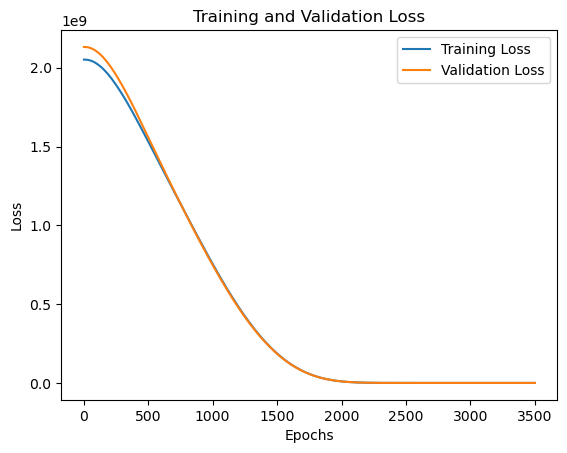

In [16]:
# Extract training and validation loss from the h object
train_loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 8: Build the Deep Neural Network Model

In [17]:
model = Sequential() # Define Sequential Model

# Define Input, Hidden layer
model.add(Dense(units= 2048, input_dim=X_train.shape[1], activation='linear'))
model.add(Dense(units= 1024, activation='linear'))
model.add(Dense(units= 512, activation='linear'))
model.add(Dense(units= 256, activation='linear'))
model.add(Dense(units= 128, activation='linear'))

# Define Output layer
model.add(Dense(units= 1, activation='linear'))  # Use linear activation for regression

# Choosing Optimizer and loss function
model.compile(optimizer='adam', loss='MSE')

### Clarify Your Deep Neural Network (DNN) Model, Optimization, and Loss Function Choices and justify 

Input Layer: Appropriate, with units equal to the number of features.

Hidden Layer: Linear activation is suitable for regression with more than 5 hidden layer.

Output Layer: with one unit and a linear activation for regression.

Optimizer: Adam is a widely used and effective choice and fast.

Loss Function: MSE is appropriate for regression tasks.

Justification: Regression is suitable for predicting car purchase amounts with continuous features.

# Step 9: Train the Model

In [18]:
# Train the model
h = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 33ms/step - loss: 2051504128.0000 - val_loss: 2131016448.0000
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 2050147968.0000 - val_loss: 2125623296.0000
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 2043039744.0000 - val_loss: 2102978560.0000
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 2012889856.0000 - val_loss: 2034375040.0000
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 1942488320.0000 - val_loss: 1870576896.0000
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 1778742272.0000 - val_loss: 1579502336.0000
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 1550155392.0000 - val_loss: 1333659648.0000
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 1401572736.0000 - val_loss: 1089687168.0000
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 

3/3 [==============================] - 0s 15ms/step - loss: 2.8749 - val_loss: 2.1540
Epoch 78/100
3/3 [==============================] - 0s 15ms/step - loss: 2.4964 - val_loss: 1.9775
Epoch 79/100
3/3 [==============================] - 0s 14ms/step - loss: 2.6031 - val_loss: 2.2607
Epoch 80/100
3/3 [==============================] - 0s 16ms/step - loss: 2.6766 - val_loss: 2.3268
Epoch 81/100
3/3 [==============================] - 0s 16ms/step - loss: 2.6148 - val_loss: 2.0600
Epoch 82/100
3/3 [==============================] - 0s 16ms/step - loss: 2.5186 - val_loss: 1.7746
Epoch 83/100
3/3 [==============================] - 0s 15ms/step - loss: 2.4301 - val_loss: 1.8474
Epoch 84/100
3/3 [==============================] - 0s 16ms/step - loss: 2.5103 - val_loss: 1.8034
Epoch 85/100
3/3 [==============================] - 0s 16ms/step - loss: 2.4996 - val_loss: 1.9133
Epoch 86/100
3/3 [==============================] - 0s 16ms/step - loss: 2.4291 - val_loss: 1.8089
Epoch 87/100
3/3 [=====

# Step 10: Evaluate the Model

In [19]:
y_pred = model.predict(X_test)

# Evaluation with different metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

4/4 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 1.8848607955836427
Mean Absolute Error (MAE): 1.0833176437501788
R-squared (R2): 0.9999999820867732


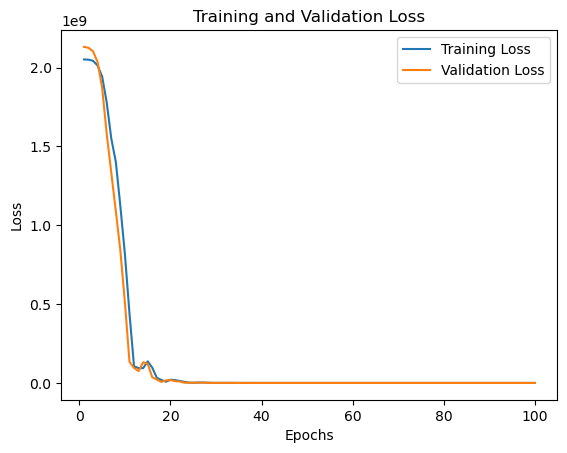

In [20]:
# Extract training and validation loss from the h object
train_loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()